# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 10</font>

## Download: http://github.com/dsacademybr

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.5


# Lab 4 - Construindo um Modelo de Regressão Linear com TensorFlow

Use como referência o Deep Learning Book: http://www.deeplearningbook.com.br/

Obs: Embora a versão 2.x do TensorFlow já esteja disponível, este Jupyter Notebook usar a versão 1.15, que também é mantida pela equipe do Google.

Caso queira aprender TensorFlow 2.0, esta versão já está disponível nos cursos da Formação IA, aqui na DSA.

Execute a célula abaixo para instalar o TensorFlow na sua máquina.

In [1]:
# Versão do TensorFlow a ser usada 
!pip install -q tensorflow==1.15.2

ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.2 (from versions: 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2)
ERROR: No matching distribution found for tensorflow==1.15.2


In [2]:
# Imports
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


## Definindo os hyperparâmetros do modelo

In [3]:
# Hyperparâmetros do modelo
learning_rate = 0.01
training_epochs = 5000
display_step = 500

## Definindo os datasets de treino e de teste

## Considere X como o tamanho de uma casa e y o preço de uma casa

In [4]:
# Dataset de treino
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
 
# Dataset de teste
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

## Placeholders e variáveis

In [5]:
# Placeholders para as variáveis preditoras (x) e para  variável target (y)
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
 
# Pesos e bias do modelo
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

## Construindo o modelo

In [6]:
# Construindo o modelo linear
# Fórmula do modelo linear: y = W*X + b
linear_model = W*X + b
 
# Mean squared error (erro quadrado médio)
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples)
 
# Otimização com Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Executando o grafo computacional, treinando e testando o modelo

Epoch:   500 	 Custo (Erro):    0.1043 	 W:0.1579 	 b: 1.463
Epoch:  1000 	 Custo (Erro):   0.08505 	 W:0.2006 	 b: 1.161
Epoch:  1500 	 Custo (Erro):   0.07934 	 W:0.2238 	 b:0.9961
Epoch:  2000 	 Custo (Erro):   0.07764 	 W:0.2365 	 b:0.9063
Epoch:  2500 	 Custo (Erro):   0.07714 	 W:0.2434 	 b:0.8574
Epoch:  3000 	 Custo (Erro):   0.07699 	 W:0.2471 	 b:0.8307
Epoch:  3500 	 Custo (Erro):   0.07695 	 W:0.2492 	 b:0.8162
Epoch:  4000 	 Custo (Erro):   0.07693 	 W:0.2503 	 b:0.8083
Epoch:  4500 	 Custo (Erro):   0.07693 	 W:0.2509 	 b: 0.804
Epoch:  5000 	 Custo (Erro):   0.07693 	 W:0.2512 	 b:0.8016

Otimização Concluída!
Custo Final de Treinamento: 0.07692934  - W Final: 0.25123832  - b Final: 0.801613 



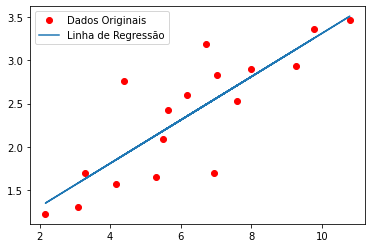

Custo Final em Teste: 0.07836874
Diferença Média Quadrada Absoluta: 0.0014394


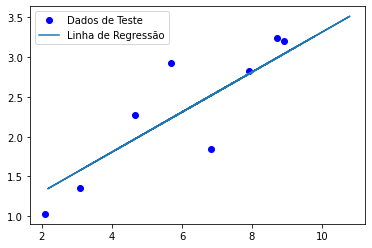

In [7]:
# Definindo a inicialização das variáveis
init = tf.global_variables_initializer()
 
# Iniciando a sessão
with tf.Session() as sess:
    # Iniciando as variáveis
    sess.run(init)
 
    # Treinamento do modelo
    for epoch in range(training_epochs):
 
        # Otimização com Gradient Descent
        sess.run(optimizer, feed_dict={X: train_X, y: train_y})
         
        # Display de cada epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, y: train_y})
            print("Epoch:{0:6} \t Custo (Erro):{1:10.4} \t W:{2:6.4} \t b:{3:6.4}".format(epoch+1, c, sess.run(W), sess.run(b)))
             
    # Imprimindo os parâmetros finais do modelo
    print("\nOtimização Concluída!")
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
    print("Custo Final de Treinamento:", training_cost, " - W Final:", sess.run(W), " - b Final:", sess.run(b), '\n')
     
    # Visualizando o resultado
    plt.plot(train_X, train_y, 'ro', label='Dados Originais')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()
 
    # Testando o modelo
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]), 
                            feed_dict={X: test_X, y: test_y})
     
    print("Custo Final em Teste:", testing_cost)
    print("Diferença Média Quadrada Absoluta:", abs(training_cost - testing_cost))
 
    # Display em Teste
    plt.plot(test_X, test_y, 'bo', label='Dados de Teste')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()
    
sess.close()

Conheça a Formação Inteligência Artificial, um programa completo, 100% online e 100% em português, com 402 horas em 9 cursos de nível intermediário/avançado, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de tecnologia. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-inteligencia-artificial

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>